## Imports & Setup

In [1]:
import talib as ta
import mplfinance as mpf
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt

#general style settings
plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'
plt.rcParams["figure.figsize"] = (15, 7.5)

## Getting data from the yahoo finance API

In [2]:
data = web.DataReader("GOOG", "yahoo")

## Moving Average Convergence/Divergence (MACD) from 2022/1/1 until now

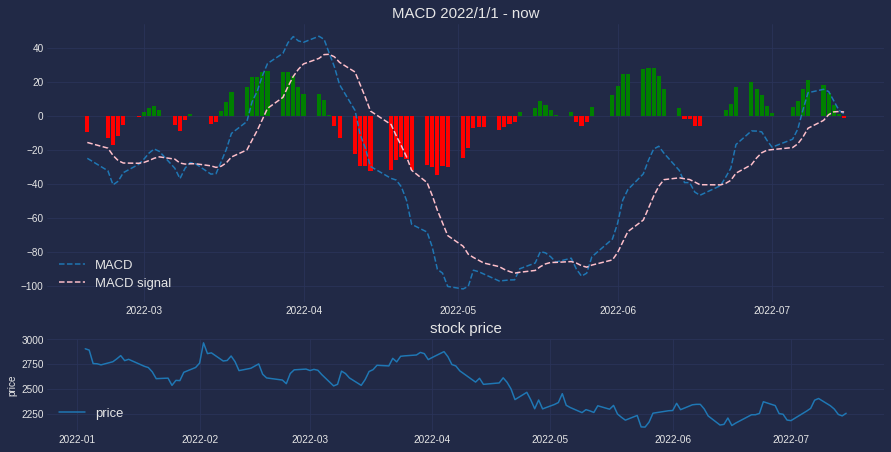

In [9]:
start = dt.datetime(2022, 1, 1)
end = dt.datetime.now()

data = web.DataReader("GOOG", "yahoo", start, end)
macd, macd_signal, macd_hist = ta.MACD(data['Close'])

fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]})
color = ["red" if cl < 0 else "green" for cl in macd_hist]


axs[0].plot(macd, linestyle="--", label=("MACD"))
axs[0].plot(macd_signal, "--", color="pink", label=("MACD signal"))
axs[0].bar(macd_hist.index, macd_hist, color=color)
axs[0].grid(color='#2A3459')
axs[0].title.set_text("MACD 2022/1/1 - now")
axs[0].title.set_size(15)
axs[0].legend(loc="lower left", fontsize=13)

axs[1].plot(data['Close'], label=("price"))
axs[1].grid(color='#2A3459')
axs[1].title.set_text("stock price")
axs[1].title.set_size(15)
axs[1].set_ylabel("price")
axs[1].legend(loc="lower left", fontsize=13)

plt.show()

## 50-day Simple Moving Average (SMA)

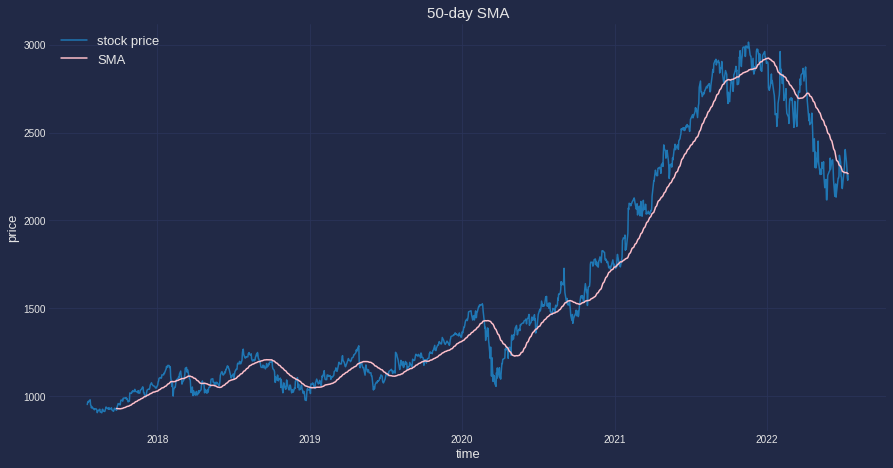

In [4]:
data = web.DataReader("GOOG", "yahoo")
data['SMA_50'] = ta.SMA(data['Close'], 50)

plt.plot(data['Close'])
plt.plot(data['SMA_50'], color="pink")
plt.grid(color='#2A3459')
plt.title(label="50-day SMA", fontsize=15)
plt.xlabel(xlabel="time", fontsize=13)
plt.ylabel(ylabel="price", fontsize=13)
plt.legend(("stock price", "SMA"), loc="upper left", fontsize=13)

plt.show()

## Bullish Engulfing & Bearish Engulfing for Q1 2022

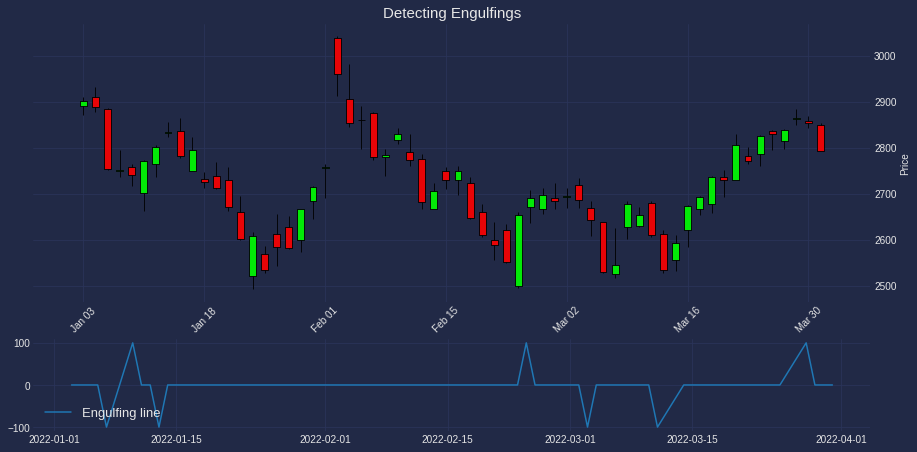

In [5]:
start = dt.datetime(2022, 1, 1)
end = dt.datetime(2022, 3, 31)

data = web.DataReader("GOOG", "yahoo", start, end)
data['ENGULFING'] = ta.CDLENGULFING(data['Open'], data['High'], data['Low'], data['Close'])

fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]})

colors = mpf.make_marketcolors(up='#00ff00', down='#ff0000')
mpf_style = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=colors)
axs[0].grid(color='#2A3459')
axs[0].title.set_text("Detecting Engulfings")
axs[0].title.set_size(15)
mpf.plot(data, type='candle', ax=axs[0], style=mpf_style)

axs[1].plot(data['ENGULFING'], label="Engulfing line")
axs[1].grid(color='#2A3459')
axs[1].legend(loc="lower left", fontsize=13)

plt.show()

## 50-day Exponential Moving Average (EMA)

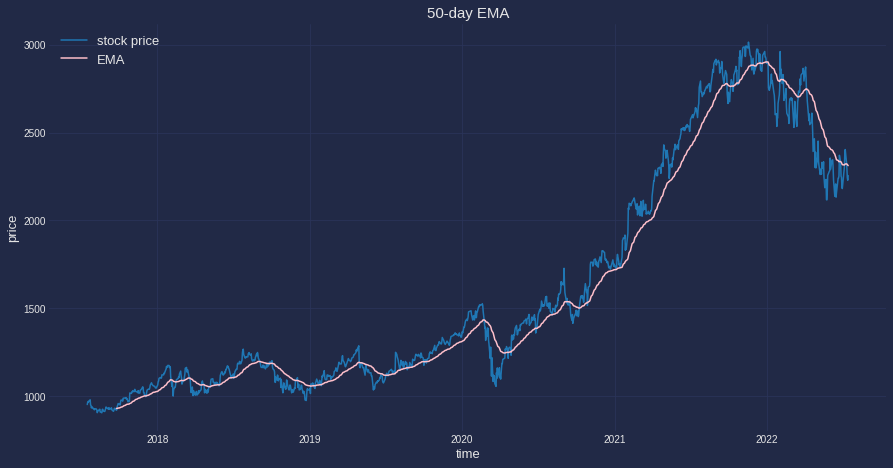

In [6]:
data = web.DataReader("GOOG", "yahoo")
data['EMA_50'] = ta.EMA(data['Close'], 50)

plt.plot(data['Close'])
plt.plot(data['EMA_50'], color="pink")
plt.grid(color='#2A3459')
plt.title(label="50-day EMA", fontsize=15)
plt.xlabel(xlabel="time", fontsize=13)
plt.ylabel(ylabel="price", fontsize=13)
plt.legend(("stock price", "EMA"), loc="upper left", fontsize=13)

plt.show()

## Relative Strength Index (RSI)

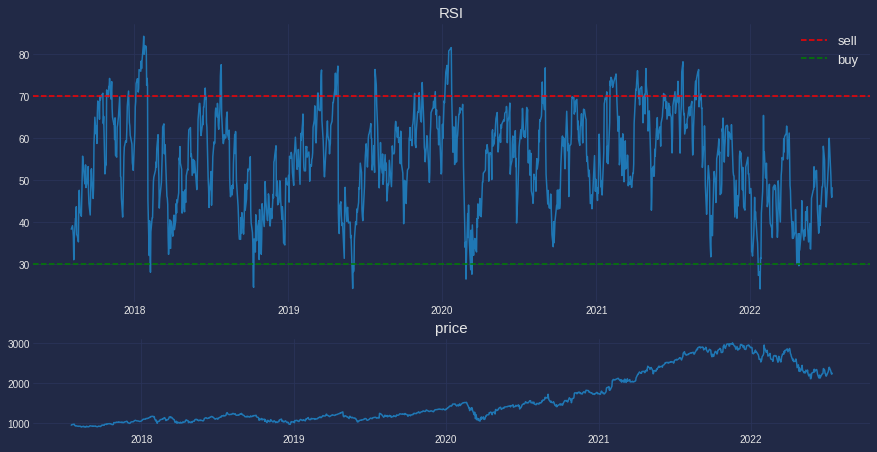

In [7]:
data = web.DataReader("GOOG", "yahoo")
data['RSI'] = ta.RSI(data['Close'])

fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]})

axs[0].plot(data["RSI"])
axs[0].axhline(y=70, color="r", linestyle="--", label="sell")
axs[0].axhline(y=30, color="g", linestyle="--", label="buy")
axs[0].grid(color='#2A3459')
axs[0].title.set_text("RSI")
axs[0].title.set_size(15)
axs[0].legend(loc="best", fontsize=13)

axs[1].plot(data['Close'])
axs[1].grid(color='#2A3459')
axs[1].title.set_text("price")
axs[1].title.set_size(15)

plt.show()

## Kaufman's Adaptive Moving Average (KAMA)

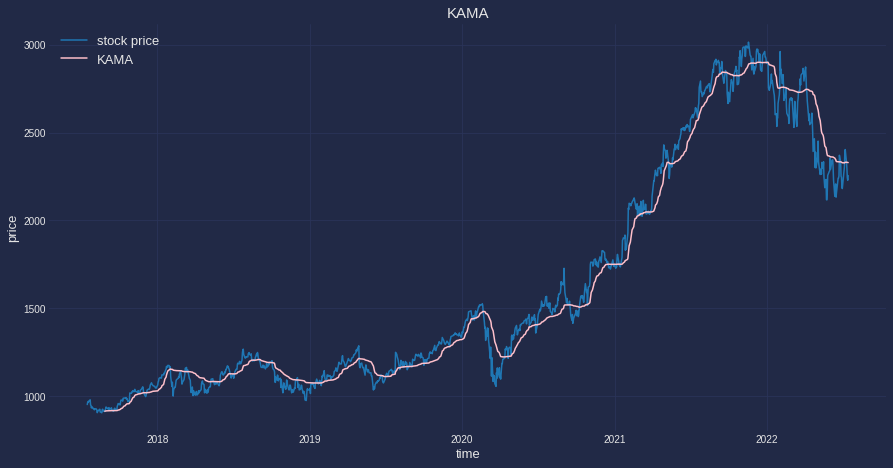

In [8]:
data = web.DataReader("GOOG", "yahoo")
data['KAMA'] = ta.KAMA(data['Close'])

plt.plot(data['Close'])
plt.plot(data['KAMA'], color="pink")
plt.grid(color='#2A3459')
plt.title(label="KAMA", fontsize=15)
plt.xlabel(xlabel="time", fontsize=13)
plt.ylabel(ylabel="price", fontsize=13)
plt.legend(("stock price", "KAMA"), loc="upper left", fontsize=13)

plt.show()